####  The international airline passengers prediction problem.

In [1]:
### This is a problem where given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960 or 12 years, with 144 observations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

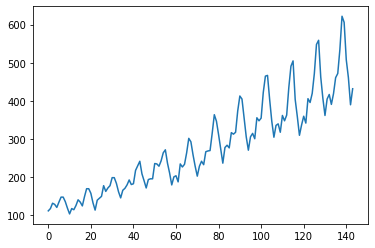

In [3]:
dataframe  =pd.read_csv('airline-passengers.csv',usecols=[1],engine='python')
dataset = dataframe.values
plt.plot(dataset)

In [26]:
dataframe.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


### we can see an upward trend in the plot.

In [4]:
dataset.shape

(144, 1)

In [6]:
dataset = dataset.astype('float')
dataframe.head()

,Passengers
0,112
1,118
2,132
3,129
4,121


In [7]:
len(dataset)

144

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [9]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [20]:
### convert an array of values into a dataset matrix
def create_dataset(dataset, look_back =1):
    datax= []
    datay =[]
    for i in range(len(dataset)-loock_back-1):
        a = dataset[i:(i+loock_back),0]
        datax.append(a)
        datay.append(dataset[i+loock_back,0])
    return np.array(datax),np.array(datay)

In [23]:
## reshape into X=T , y= T+1
loock_back = 1
X_train,y_train  = create_dataset(train,loock_back)
X_test,y_test  =create_dataset(test,loock_back)

In [34]:
X_train.shape , y_train.shape

((94, 1), (94,))

In [28]:
### creating the model
model = Sequential()
model.add(Dense(8,input_dim = loock_back,activation = 'relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.fit(X_train,y_train,epochs= 200,batch_size = 32,verbose=1,validation_data = (X_test,y_test))

Epoch 1/200
3/3 [==============================] - 0s 38ms/step - loss: 534.5691 - val_loss: 2361.6746
Epoch 2/200
3/3 [==============================] - 0s 16ms/step - loss: 534.5519 - val_loss: 2361.6804
Epoch 3/200
3/3 [==============================] - 0s 21ms/step - loss: 534.5914 - val_loss: 2361.7561
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 534.5834 - val_loss: 2361.8135
Epoch 5/200
3/3 [==============================] - 0s 20ms/step - loss: 534.6647 - val_loss: 2361.7112
Epoch 6/200
3/3 [==============================] - 0s 19ms/step - loss: 534.5709 - val_loss: 2361.7559
Epoch 7/200
3/3 [==============================] - 0s 20ms/step - loss: 534.5667 - val_loss: 2361.7937
Epoch 8/200
3/3 [==============================] - 0s 22ms/step - loss: 534.5488 - val_loss: 2361.7844
Epoch 9/200
3/3 [==============================] - 0s 20ms/step - loss: 534.5607 - val_loss: 2361.8013
Epoch 10/200
3/3 [==============================] - 0s 19ms/step - loss: 

3/3 [==============================] - 0s 22ms/step - loss: 534.5424 - val_loss: 2361.9148
Epoch 80/200
3/3 [==============================] - 0s 18ms/step - loss: 534.5533 - val_loss: 2361.8027
Epoch 81/200
3/3 [==============================] - 0s 21ms/step - loss: 534.5479 - val_loss: 2361.7209
Epoch 82/200
3/3 [==============================] - 0s 20ms/step - loss: 534.5200 - val_loss: 2361.7046
Epoch 83/200
3/3 [==============================] - 0s 18ms/step - loss: 534.5439 - val_loss: 2361.8188
Epoch 84/200
3/3 [==============================] - 0s 17ms/step - loss: 534.5565 - val_loss: 2361.8640
Epoch 85/200
3/3 [==============================] - 0s 19ms/step - loss: 534.6263 - val_loss: 2361.7258
Epoch 86/200
3/3 [==============================] - 0s 19ms/step - loss: 534.5057 - val_loss: 2361.8032
Epoch 87/200
3/3 [==============================] - 0s 19ms/step - loss: 534.5272 - val_loss: 2361.7646
Epoch 88/200
3/3 [==============================] - 0s 21ms/step - loss: 534.

3/3 [==============================] - 0s 17ms/step - loss: 534.4244 - val_loss: 2361.8052
Epoch 158/200
3/3 [==============================] - 0s 19ms/step - loss: 534.4477 - val_loss: 2361.8774
Epoch 159/200
3/3 [==============================] - 0s 18ms/step - loss: 534.4722 - val_loss: 2361.8560
Epoch 160/200
3/3 [==============================] - 0s 22ms/step - loss: 534.4442 - val_loss: 2361.7559
Epoch 161/200
3/3 [==============================] - 0s 19ms/step - loss: 534.4325 - val_loss: 2361.7588
Epoch 162/200
3/3 [==============================] - 0s 18ms/step - loss: 534.4350 - val_loss: 2361.7236
Epoch 163/200
3/3 [==============================] - 0s 19ms/step - loss: 534.5105 - val_loss: 2361.5806
Epoch 164/200
3/3 [==============================] - 0s 21ms/step - loss: 534.4493 - val_loss: 2361.6526
Epoch 165/200
3/3 [==============================] - 0s 17ms/step - loss: 534.4386 - val_loss: 2361.5837
Epoch 166/200
3/3 [==============================] - 0s 19ms/step - l

In [31]:
### estimate model performance
train_predict =  model.predict(X_train)
test_predict  =model.predict(X_test)

In [32]:
train_predict

array([[112.61676 ],
       [118.59675 ],
       [132.55005 ],
       [129.56004 ],
       [121.58675 ],
       [135.54004 ],
       [148.49667 ],
       [148.49667 ],
       [136.53671 ],
       [119.593414],
       [104.64344 ],
       [118.59675 ],
       [115.60676 ],
       [126.57007 ],
       [141.52005 ],
       [135.54004 ],
       [125.5734  ],
       [149.49335 ],
       [170.42331 ],
       [170.42331 ],
       [158.46332 ],
       [133.54672 ],
       [114.61009 ],
       [140.52338 ],
       [145.50668 ],
       [150.49002 ],
       [178.39664 ],
       [163.44666 ],
       [172.41663 ],
       [178.39664 ],
       [199.3266  ],
       [199.3266  ],
       [184.3766  ],
       [162.44998 ],
       [146.50334 ],
       [166.43666 ],
       [171.41997 ],
       [180.38997 ],
       [193.3466  ],
       [181.38663 ],
       [183.37996 ],
       [218.26323 ],
       [230.2232  ],
       [242.18318 ],
       [209.29324 ],
       [191.35327 ],
       [172.41663 ],
       [194.3

In [35]:
### calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

23.116178254704373

In [36]:
## test data metrics
math.sqrt(mean_squared_error(y_test,test_predict))

48.591393182567224

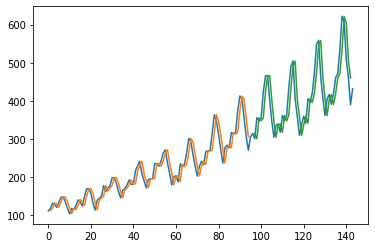

In [41]:
# generate predictions for training
import numpy

trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[loock_back:len(trainPredict)+loock_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(loock_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()